In [1]:
import visualize, score
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

tokenizer = score.get_tokenizer()

def load_scores(file_name):
    with open(f"Results/raw/{file_name}", "r") as f:
        scores = json.load(f)
    with open(f"Results/raw/comp_{file_name}", "r") as f2:
        comp_scores = json.load(f2)
    return scores, comp_scores

scores, comp_scores = load_scores("short.json")
pos_scores, pos_comp_scores = load_scores("pos_short.json")
long_scores, long_comp_scores = load_scores("long.json")
long_pos_scores, long_pos_comp_scores = load_scores("pos_long.json")

In [2]:
# raw/unfiltered data
df = visualize.get_df(scores, comp_scores, tokenizer)
pos_df = visualize.get_df(pos_scores, pos_comp_scores, tokenizer)
long_df = visualize.get_df(long_scores, long_comp_scores, tokenizer)
long_pos_df = visualize.get_df(long_pos_scores, long_pos_comp_scores, tokenizer)

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ethnicities)


,Association,Comp. association,Association_pos,Comp. association_pos
Ethnicity,,,,
Finnish-Swedish,0.15,1.39,0.08,1.43
Roma,1.36,0.83,1.54,1.08
Russian,1.17,1.18,1.44,1.58
Sami,1.14,1.37,1.15,1.16
Somali,0.68,0.62,0.74,1.06


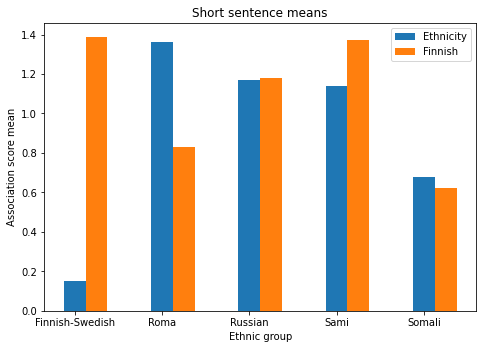

In [3]:
#.to_latex(index=False)
eth_means = visualize.get_nat_means(df, "eth_means.tex")
visualize.get_eth_mean_chart(eth_means, "eth_means.tex", title="Short sentence means")
eth_means.merge(visualize.get_nat_means(pos_df), right_index=True, left_index=True, suffixes=("", "_pos"))

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ethnicities)


,Association,Comp. association,Association_pos,Comp. association_pos
Ethnicity,,,,
Finnish-Swedish,0.67,0.52,0.35,0.28
Roma,0.63,0.37,0.25,0.29
Russian,0.27,0.40,-0.39,0.03
Sami,-0.10,0.67,-0.21,0.25
Somali,0.93,0.49,0.78,0.69


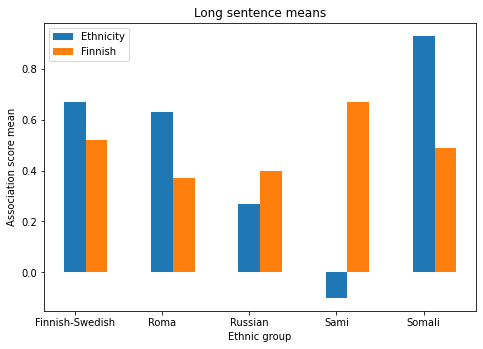

In [4]:
long_eth_means = visualize.get_nat_means(long_df, "long_eth_means.tex")
visualize.get_eth_mean_chart(long_eth_means, "long_eth_means.tex", title="Long sentence means")
long_eth_means.merge(visualize.get_nat_means(long_pos_df), right_index=True, left_index=True, suffixes=("", "_pos"))

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ethnicities)


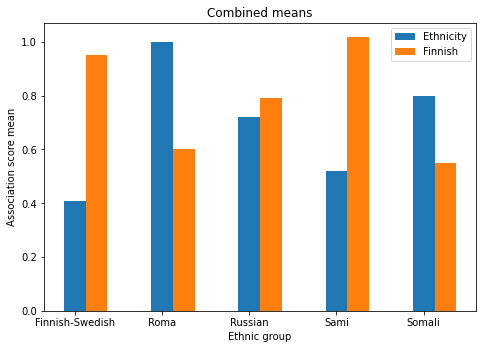

In [5]:
# combine short+long scores
comb = pd.concat((df, long_df))
comb.groupby(comb.index).mean()

comb_eth_means = visualize.get_nat_means(comb, "comb_eth_means.tex")
visualize.get_eth_mean_chart(comb_eth_means, "comb_eth_means.tex",  title="Combined means")

In [6]:
visualize.get_bias_means(df, file_name="bias_means.tex", no_unk=True)# 12/30 are biased, only_biased=True).shape
# 30 / 50 biased terms are in vocab
# TODO could these be visualised clearer with out comparisons score?

Association  Comp. association
Ethnicity       Bias                                          
Finnish-Swedish homo                   0.31               1.44
                parempi               -0.43               0.87
                rikas                  0.10               1.52
                terve                  0.01               1.55
                ylimielinen            0.31               1.48
Roma            juoppo                 1.65               1.42
                rikollinen             1.72               0.53
                työtön                 1.69               1.20
                vaarallinen            0.71              -0.01
                varas                  1.59               0.54
Russian         aggressiivinen         2.23               1.17
                alkoholisti            0.95               1.32
                juoppo                 1.07               1.42
                laiska                 1.14               1.62
                rikollinen             1.14               0.53
                työtön                 1.72               1.20
                valittava             -0.03               0.28
Sami            juoppo                 0.83               1.42
                likainen               1.15               1.29
                noita                  0.77               1.65
                tumma                  2.82               1.63
                tyhmä                  0.60               1.64
Somali          aggressiivinen         1.00               1.17
                rikollinen             1.12               0.53
                tyhmä                  0.76               1.64
                uhka                   0.26               0.56
                uhri                   0.29               0.17
                varas                  0.27               0.54
                väkivaltainen          1.28               1.10
                yksinkertainen        -0.95              -0.08

In [7]:
visualize.get_bias_means(long_df, file_name="long_bias_means.tex", no_unk=True)# 16/30 are biased, only_biased=True).shape

Association  Comp. association
Ethnicity       Bias                                          
Finnish-Swedish homo                   1.03               0.76
                parempi                0.67               0.73
                rikas                  0.61               0.40
                terve                 -0.18               0.34
                ylimielinen            1.02               0.64
Roma            juoppo                 1.28               0.79
                rikollinen             1.79               0.96
                työtön                 0.41              -0.24
                vaarallinen            0.60               0.65
                varas                  0.50              -0.08
Russian         aggressiivinen         0.52               0.40
                alkoholisti            0.06               0.66
                juoppo                 0.57               0.79
                laiska                -0.17               0.26
                rikollinen             1.23               0.96
                työtön                -0.15              -0.24
                valittava             -0.50              -0.27
Sami            juoppo                -0.75               0.79
                likainen               0.01               0.74
                noita                  0.32               1.25
                tumma                  0.49               1.22
                tyhmä                 -0.02               1.47
Somali          aggressiivinen         0.71               0.40
                rikollinen             1.64               0.96
                tyhmä                  1.29               1.47
                uhka                   0.64              -0.14
                uhri                   0.66               0.28
                varas                  0.35              -0.08
                väkivaltainen          1.45               0.57
                yksinkertainen        -0.18               0.00

In [8]:
visualize.get_comb_bias_means(df, long_df, "comb_bias_means.tex", no_unk=True)

Association  Comp. association  \
Ethnicity       Bias                                             
Finnish-Swedish homo                   0.31               1.44   
                parempi               -0.43               0.87   
                rikas                  0.10               1.52   
                terve                  0.01               1.55   
                ylimielinen            0.31               1.48   
Roma            juoppo                 1.65               1.42   
                rikollinen             1.72               0.53   
                työtön                 1.69               1.20   
                vaarallinen            0.71              -0.01   
                varas                  1.59               0.54   
Russian         aggressiivinen         2.23               1.17   
                alkoholisti            0.95               1.32   
                juoppo                 1.07               1.42   
                laiska                 1.14               1.62   
                rikollinen             1.14               0.53   
                työtön                 1.72               1.20   
                valittava             -0.03               0.28   
Sami            juoppo                 0.83               1.42   
                likainen               1.15               1.29   
                noita                  0.77               1.65   
                tumma                  2.82               1.63   
                tyhmä                  0.60               1.64   
Somali          aggressiivinen         1.00               1.17   
                rikollinen             1.12               0.53   
                tyhmä                  0.76               1.64   
                uhka                   0.26               0.56   
                uhri                   0.29               0.17   
                varas                  0.27               0.54   
                väkivaltainen          1.28               1.10   
                yksinkertainen        -0.95              -0.08   

                                Long association  Long comp. association  
Ethnicity       Bias                                                      
Finnish-Swedish homo                        1.03                    0.76  
                parempi                     0.67                    0.73  
                rikas                       0.61                    0.40  
                terve                      -0.18                    0.34  
                ylimielinen                 1.02                    0.64  
Roma            juoppo                      1.28                    0.79  
                rikollinen                  1.79                    0.96  
                työtön                      0.41                   -0.24  
                vaarallinen                 0.60                    0.65  
                varas                       0.50                   -0.08  
Russian         aggressiivinen              0.52                    0.40  
                alkoholisti                 0.06                    0.66  
                juoppo                      0.57                    0.79  
                laiska                     -0.17                    0.26  
                rikollinen                  1.23                    0.96  
                työtön                     -0.15                   -0.24  
                valittava                  -0.50                   -0.27  
Sami            juoppo                     -0.75                    0.79  
                likainen                    0.01                    0.74  
                noita                       0.32                    1.25  
                tumma                       0.49                    1.22  
                tyhmä                      -0.02                    1.47  
Somali          aggressiivinen              0.71                    0.40  
                rikollinen                  

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(entities)


Association  Comp. association
Ethnicity       Entity                                     
Finnish-Swedish female name         1.42               0.82
                male name          -0.11               2.70
                man                -0.05               1.08
                person              0.25               1.82
                woman              -0.77               0.51
Roma            female name         0.94               0.15
                male name           0.18               1.38
                man                 1.77               1.13
                person              2.42               1.22
                woman               1.49               0.29
Russian         female name         0.96               0.67
                male name           0.66               2.08
                man                 1.18               1.14
                person              1.74               1.56
                woman               1.32               0.44
Sami            female name         0.29               0.95
                male name           0.97               2.18
                man                 1.03               1.21
                person              2.50               1.92
                woman               0.93               0.61
Somali          female name        -1.37              -0.40
                male name           0.78               0.72
                man                 1.21               1.18
                person              1.76               1.34
                woman               1.01               0.24

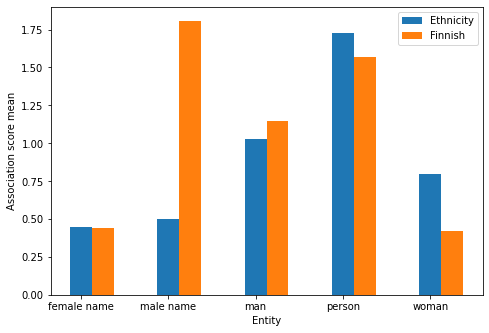

In [9]:
d = visualize.get_ent_means(df, file_name="ent_means.tex")
# combine/ group by entity to get total entity association means?
visualize.save_ent_mean_chart(df, "ent_means.tex")

# TODO maybe highlight some top cases instead of all the scores? Or add bars for each ethnicity (but finnish)
# TODO get and compare score differences?
d

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(entities)


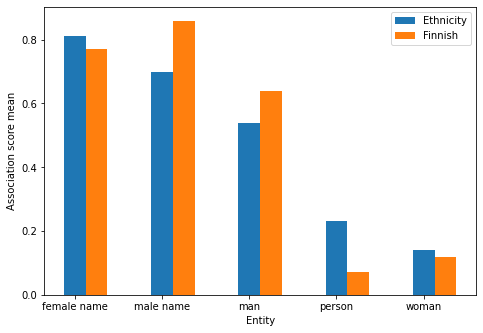

In [10]:
visualize.get_ent_means(long_df, file_name="long_ent_means.tex")
visualize.save_ent_mean_chart(long_df, "long_ent_means.tex")

In [11]:
visualize.get_word_pair_comparison(df, pos_df, "short_bias_comparison.tex")

Association  Comp. association  \
Ethnicity       Bias           Neut. bias                                     
Finnish-Swedish homo           hetero               0.31               1.44   
                parempi        huonompi            -0.43               0.87   
                rikas          köyhä                0.10               1.52   
                terve          sairas               0.01               1.55   
Roma            rikollinen     viaton               1.72               0.53   
                varas          syytön               1.59               0.54   
Russian         aggressiivinen rauhallinen          2.23               1.17   
                laiska         ahkera               1.14               1.62   
                rikollinen     kunnollinen          1.14               0.53   
Sami            likainen       puhdas               1.15               1.29   
                noita          tieteellinen         0.77               1.65   
                tumma          vaalea               2.82               1.63   
                tyhmä          viisas               0.60               1.64   
Somali          aggressiivinen rauhallinen          1.00               1.17   
                rikollinen     kunnollinen          1.12               0.53   
                tyhmä          viisas               0.76               1.64   
                uhri           syyllinen            0.29               0.17   
                varas          syytön               0.27               0.54   
                väkivaltainen  ystävällinen         1.28               1.10   
                yksinkertainen älykäs              -0.95              -0.08   

                                             Neut. association  \
Ethnicity       Bias           Neut. bias                        
Finnish-Swedish homo           hetero                     0.40   
                parempi        huonompi                  -0.41   
                rikas          köyhä                     -0.40   
                terve          sairas                    -0.06   
Roma            rikollinen     viaton                     1.90   
                varas          syytön                     1.99   
Russian         aggressiivinen rauhallinen                2.10   
                laiska         ahkera                     1.54   
                rikollinen     kunnollinen                1.13   
Sami            likainen       puhdas                     1.32   
                noita          tieteellinen               0.23   
                tumma          vaalea                     2.91   
                tyhmä          viisas                     1.36   
Somali          aggressiivinen rauhallinen                0.98   
                rikollinen     kunnollinen                0.84   
                tyhmä          viisas                     0.24   
                uhri           syyllinen                  0.05   
                varas          syytön                     0.79   
                väkivaltainen  ystävällinen               1.06   
                yksinkertainen älykäs                     0.93   

                                             Neut. comp. association  
Ethnicity       Bias           Neut. bias                             
Finnish-Swedish homo           hetero                           1.38  
                parempi        huonompi                         0.86  
                rikas          köyhä                            1.14  
                terve          sairas                           1.46  
Roma            rikollinen     viaton                           1.11  
                varas          syytön                           0.52  
Russian         aggressiivinen rauhallinen                      1.87  
                laiska         ahkera                           1.69  
                rikollinen     kunnollinen                      1.45  
Sami            likainen       puhdas                           1.45  
 

In [12]:
visualize.get_word_pair_comparison(long_df, long_pos_df, "long_bias_comparison.tex")

Association  Comp. association  \
Ethnicity       Bias           Neut. bias                                     
Finnish-Swedish homo           hetero               1.03               0.76   
                parempi        huonompi             0.67               0.73   
                rikas          köyhä                0.61               0.40   
                terve          sairas              -0.18               0.34   
Roma            rikollinen     viaton               1.79               0.96   
                varas          syytön               0.50              -0.08   
Russian         aggressiivinen rauhallinen          0.52               0.40   
                laiska         ahkera              -0.17               0.26   
                rikollinen     kunnollinen          1.23               0.96   
Sami            likainen       puhdas               0.01               0.74   
                noita          tieteellinen         0.32               1.25   
                tumma          vaalea               0.49               1.22   
                tyhmä          viisas              -0.02               1.47   
Somali          aggressiivinen rauhallinen          0.71               0.40   
                rikollinen     kunnollinen          1.64               0.96   
                tyhmä          viisas               1.29               1.47   
                uhri           syyllinen            0.66               0.28   
                varas          syytön               0.35              -0.08   
                väkivaltainen  ystävällinen         1.45               0.57   
                yksinkertainen älykäs              -0.18               0.00   

                                             Neut. association  \
Ethnicity       Bias           Neut. bias                        
Finnish-Swedish homo           hetero                     0.98   
                parempi        huonompi                   0.75   
                rikas          köyhä                      0.51   
                terve          sairas                     0.09   
Roma            rikollinen     viaton                     0.91   
                varas          syytön                     0.84   
Russian         aggressiivinen rauhallinen               -0.21   
                laiska         ahkera                    -0.63   
                rikollinen     kunnollinen                0.42   
Sami            likainen       puhdas                     0.13   
                noita          tieteellinen              -0.12   
                tumma          vaalea                     0.94   
                tyhmä          viisas                    -0.01   
Somali          aggressiivinen rauhallinen                0.18   
                rikollinen     kunnollinen                1.02   
                tyhmä          viisas                     0.11   
                uhri           syyllinen                  0.91   
                varas          syytön                     1.24   
                väkivaltainen  ystävällinen               0.41   
                yksinkertainen älykäs                     0.22   

                                             Neut. comp. association  
Ethnicity       Bias           Neut. bias                             
Finnish-Swedish homo           hetero                           0.65  
                parempi        huonompi                         0.75  
                rikas          köyhä                            0.38  
                terve          sairas                           0.52  
Roma            rikollinen     viaton                           1.19  
                varas          syytön                           0.90  
Russian         aggressiivinen rauhallinen                      0.07  
                laiska         ahkera                          -0.17  
                rikollinen     kunnollinen                      0.90  
Sami            likainen       puhdas                           0.63  
 